In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load the datasets
train_data = pd.read_csv('Fast_Furious_Insured/raw_data/train.csv')
test_data = pd.read_csv('Fast_Furious_Insured/raw_data/test.csv')

### Data Summary

In [3]:
# Display the first few rows of the datasets
print("Training Data Overview")
print(train_data.head())
print(test_data.head())

Training Data Overview
        Image_path Insurance_company  Cost_of_vehicle  Min_coverage  \
0  img_4513976.jpg                BQ          41500.0        1037.5   
1  img_7764995.jpg                BQ          50700.0        1267.5   
2   img_451308.jpg                 A          49500.0        1237.5   
3  img_7768372.jpg                 A          33500.0         837.5   
4  img_7765274.jpg                AC          27600.0         690.0   

  Expiry_date  Max_coverage  Condition  Amount  
0  03-12-2026      36142.68          0     0.0  
1  10-07-2025      12753.00          1  6194.0  
2  11-08-2022      43102.68          0     0.0  
3  02-08-2022       8453.00          1  7699.0  
4  01-05-2026       6978.00          1  8849.0  
        Image_path Insurance_company  Cost_of_vehicle  Min_coverage  \
0  img_4538519.jpg                 B            23600         590.0   
1  img_7766002.jpg                 C            28300         707.5   
2  img_4637390.jpg                AC       

In [4]:
# Missing values and data types
print("\nMissing Values and Data Types:")
print(train_data.info())
print(test_data.info())


Missing Values and Data Types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1399 entries, 0 to 1398
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Image_path         1399 non-null   object 
 1   Insurance_company  1399 non-null   object 
 2   Cost_of_vehicle    1310 non-null   float64
 3   Min_coverage       1310 non-null   float64
 4   Expiry_date        1399 non-null   object 
 5   Max_coverage       1310 non-null   float64
 6   Condition          1399 non-null   int64  
 7   Amount             1388 non-null   float64
dtypes: float64(4), int64(1), object(3)
memory usage: 87.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Image_path         600 non-null    object 
 1   Insurance_company  600 non-null    object 
 2   Cost_of_vehic

In [5]:
print(train_data.shape)
print(test_data.shape)

(1399, 8)
(600, 6)


In [6]:
print(train_data.isnull().sum())
print(test_data.isnull().sum())

Image_path            0
Insurance_company     0
Cost_of_vehicle      89
Min_coverage         89
Expiry_date           0
Max_coverage         89
Condition             0
Amount               11
dtype: int64
Image_path           0
Insurance_company    0
Cost_of_vehicle      0
Min_coverage         0
Expiry_date          0
Max_coverage         0
dtype: int64


In [7]:
train_data.drop_duplicates(inplace=True)

In [8]:
print(train_data.shape)

(1399, 8)


In [9]:
# Statistical summary of the numerical features
print(train_data.describe())
print(test_data.describe())

       Cost_of_vehicle  Min_coverage  Max_coverage    Condition        Amount
count      1310.000000   1310.000000   1310.000000  1399.000000   1388.000000
mean      37454.274809    936.356870  11242.925160     0.929235   4117.144092
std        8921.428143    223.035704   7163.735952     0.256523   3151.516223
min       11100.000000    277.500000   2853.000000     0.000000   -999.000000
25%       29800.000000    745.000000   7603.000000     1.000000   1641.750000
50%       37300.000000    932.500000   9678.000000     1.000000   4070.000000
75%       45175.000000   1129.375000  11703.000000     1.000000   6039.500000
max       53500.000000   1337.500000  46495.680000     1.000000  59844.000000
       Cost_of_vehicle  Min_coverage  Max_coverage
count       600.000000    600.000000    600.000000
mean      38175.500000    954.387500  11281.169267
std        9181.904052    229.547601   6804.330322
min       20000.000000    500.000000   5078.000000
25%       30600.000000    765.000000   7990

### Graphs

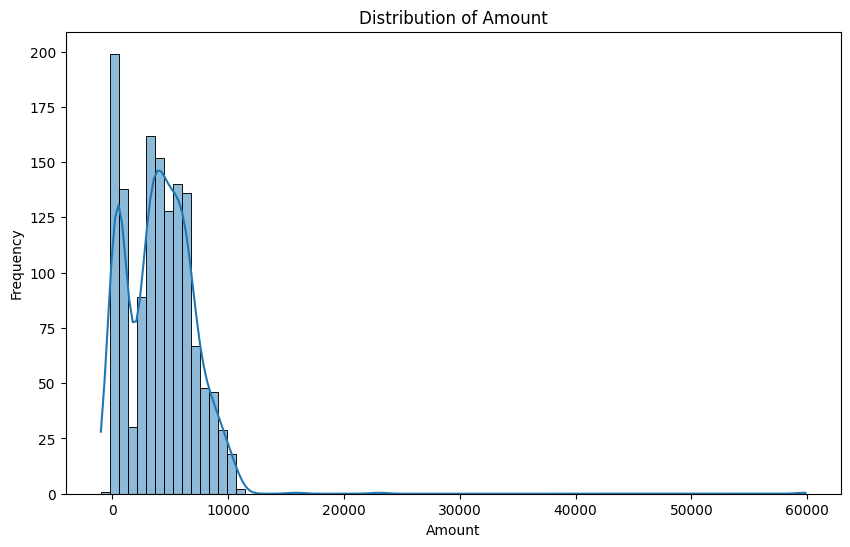

In [10]:
# Plot distribution of Amount
plt.figure(figsize=(10,6))
sns.histplot(train_data['Amount'], kde=True)
plt.title('Distribution of Amount')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

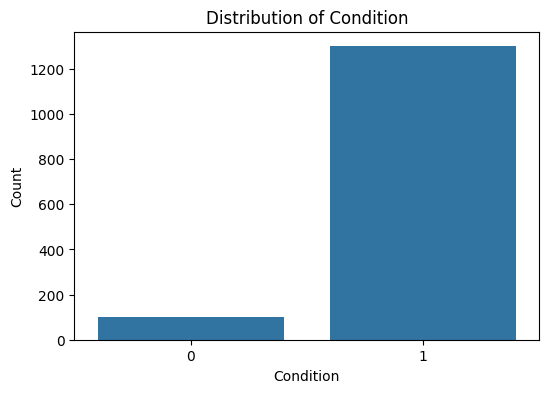

In [11]:
# Plot the distribution of the binary column 'Condition'
plt.figure(figsize=(6,4))
sns.countplot(x='Condition', data=train_data)
plt.title('Distribution of Condition')
plt.xlabel('Condition')
plt.ylabel('Count')
plt.show()


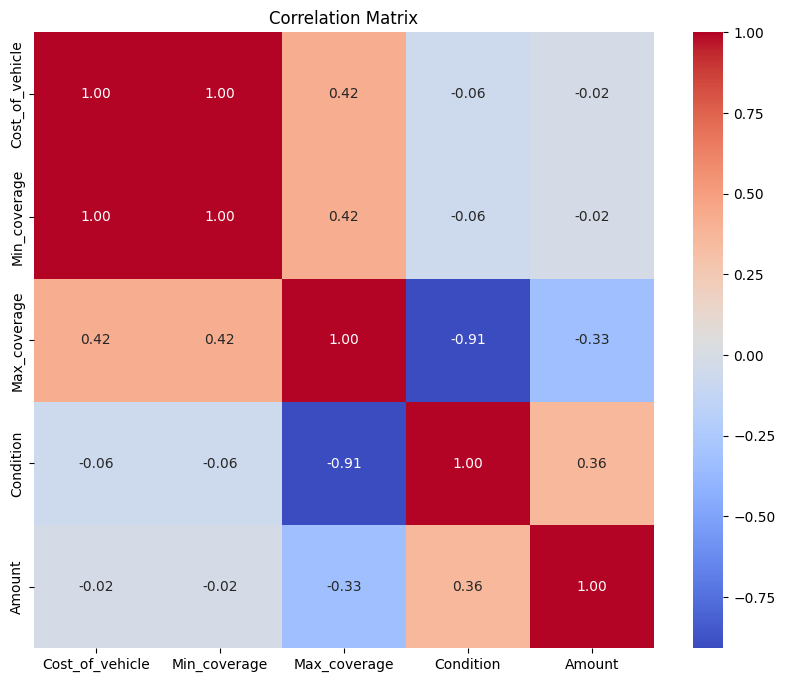

In [12]:
# Select only numeric columns for correlation
numeric_cols = train_data.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numeric_cols.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()



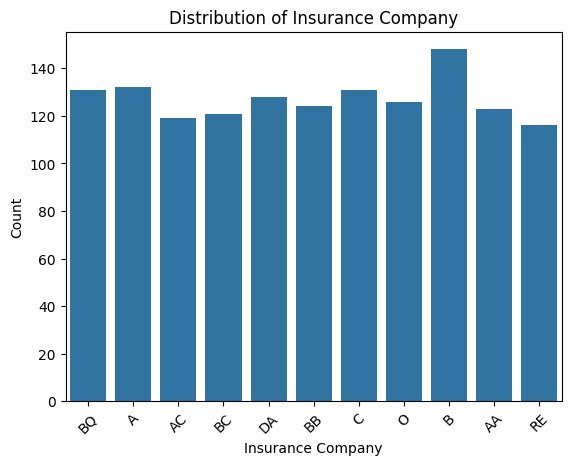

In [13]:
# categorical variables, plot their distributions
sns.countplot(x='Insurance_company', data=train_data)
plt.title('Distribution of Insurance Company')
plt.xlabel('Insurance Company')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


### Correlation between Insurance_Company and 'Condition, Amount'

In [14]:
import pandas as pd
# Apply one-hot encoding
train_data_encoded = pd.get_dummies(train_data, columns=['Insurance_company'], drop_first=True)

# Calculate the correlation between 'Insurance_company' columns and 'Condition' and 'Amount'
insurance_columns = [col for col in train_data_encoded.columns if 'Insurance_company' in col]

# Extract correlation for Insurance_company and Condition, Amount
cor_insurance_condition = train_data_encoded[insurance_columns + ['Condition']].corr()['Condition']
cor_insurance_amount = train_data_encoded[insurance_columns + ['Amount']].corr()['Amount']

# Display the correlation values
print("Correlation between Insurance Company and Condition:")
print(cor_insurance_condition)

print("\nCorrelation between Insurance Company and Amount:")
print(cor_insurance_amount)


Correlation between Insurance Company and Condition:
Insurance_company_AA   -0.032444
Insurance_company_AC    0.024191
Insurance_company_B     0.022414
Insurance_company_BB   -0.012016
Insurance_company_BC   -0.014255
Insurance_company_BQ   -0.026120
Insurance_company_C     0.012154
Insurance_company_DA    0.010228
Insurance_company_O    -0.000814
Insurance_company_RE    0.032435
Condition               1.000000
Name: Condition, dtype: float64

Correlation between Insurance Company and Amount:
Insurance_company_AA    0.032497
Insurance_company_AC   -0.016949
Insurance_company_B     0.016790
Insurance_company_BB   -0.022174
Insurance_company_BC    0.002173
Insurance_company_BQ    0.016720
Insurance_company_C    -0.042418
Insurance_company_DA    0.002732
Insurance_company_O    -0.022361
Insurance_company_RE    0.015274
Amount                  1.000000
Name: Amount, dtype: float64


Very less correlation between insurance company and Condition, Amount

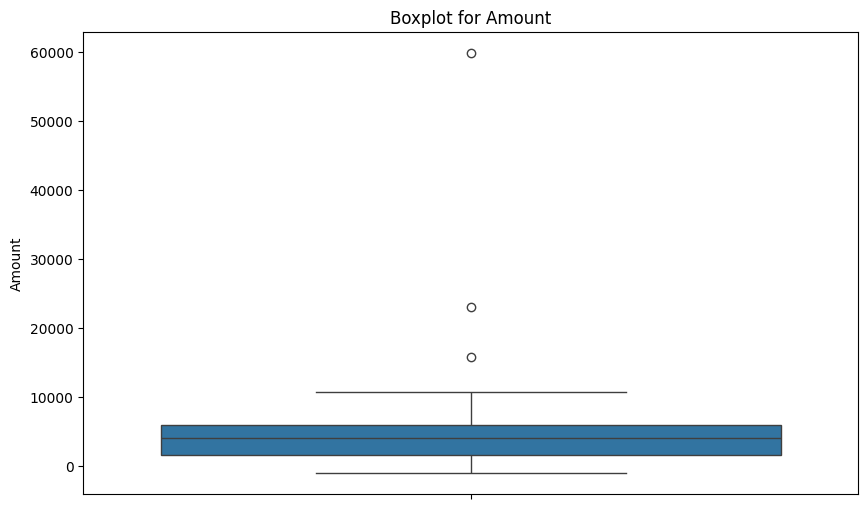

In [15]:
# Check for outliers using boxplot
plt.figure(figsize=(10,6))
sns.boxplot(y=train_data['Amount'])
plt.title('Boxplot for Amount')
plt.show()


Outliers in the dataset, therefore use Median to handle missing values

### Handling missing values 

In [16]:
# Check rows where all three columns have missing values
missing_mask = train_data[['Cost_of_vehicle', 'Min_coverage', 'Max_coverage']].isnull()
print(missing_mask)
missing_all_three = missing_mask.all(axis=1)
print("Rows with missing values in all three columns:\n", train_data[missing_all_three])

      Cost_of_vehicle  Min_coverage  Max_coverage
0               False         False         False
1               False         False         False
2               False         False         False
3               False         False         False
4               False         False         False
...               ...           ...           ...
1394            False         False         False
1395            False         False         False
1396            False         False         False
1397            False         False         False
1398             True          True          True

[1399 rows x 3 columns]
Rows with missing values in all three columns:
            Image_path Insurance_company  Cost_of_vehicle  Min_coverage  \
8     img_7767281.jpg                DA              NaN           NaN   
13    img_7767681.jpg                DA              NaN           NaN   
14    img_4536138.jpg                 C              NaN           NaN   
21    img_4636799.jpg          

In [17]:
# Remove these rows from the dataset
train_data_cleaned = train_data[~missing_all_three]

In [18]:
# Print the updated dataset shape
print(f"Original dataset shape: {train_data.shape}")
print(f"Updated dataset shape: {train_data_cleaned.shape}")

Original dataset shape: (1399, 8)
Updated dataset shape: (1310, 8)


In [19]:
print(train_data_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1310 entries, 0 to 1397
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Image_path         1310 non-null   object 
 1   Insurance_company  1310 non-null   object 
 2   Cost_of_vehicle    1310 non-null   float64
 3   Min_coverage       1310 non-null   float64
 4   Expiry_date        1310 non-null   object 
 5   Max_coverage       1310 non-null   float64
 6   Condition          1310 non-null   int64  
 7   Amount             1301 non-null   float64
dtypes: float64(4), int64(1), object(3)
memory usage: 92.1+ KB
None


In [20]:
print(train_data_cleaned.isnull().sum())

Image_path           0
Insurance_company    0
Cost_of_vehicle      0
Min_coverage         0
Expiry_date          0
Max_coverage         0
Condition            0
Amount               9
dtype: int64


In [21]:
amount_median=train_data_cleaned['Amount'].median()

In [22]:
amount_mean= train_data_cleaned['Amount'].mean()

In [23]:
train_data_cleaned['Amount'].fillna(amount_median, inplace=True)

C:\Users\varsh\AppData\Local\Temp\ipykernel_9692\2552468132.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data_cleaned['Amount'].fillna(amount_median, inplace=True)
C:\Users\varsh\AppData\Local\Temp\ipykernel_9692\2552468132.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data_cleaned['Amount'].fillna(amount_median, inpla

In [24]:
print(train_data_cleaned.isnull().sum())

Image_path           0
Insurance_company    0
Cost_of_vehicle      0
Min_coverage         0
Expiry_date          0
Max_coverage         0
Condition            0
Amount               0
dtype: int64


In [25]:
print(train_data_cleaned.shape)

(1310, 8)


# Images EDA

In [26]:
import os

train_images_path = "Fast_Furious_Insured/images/train_images"
test_images_path = "Fast_Furious_Insured/images/test_images"

num_train_images = len(os.listdir(train_images_path))
num_test_images = len(os.listdir(test_images_path))

print(f"Number of training images: {num_train_images}")
print(f"Number of test images: {num_test_images}")


Number of training images: 1399
Number of test images: 600


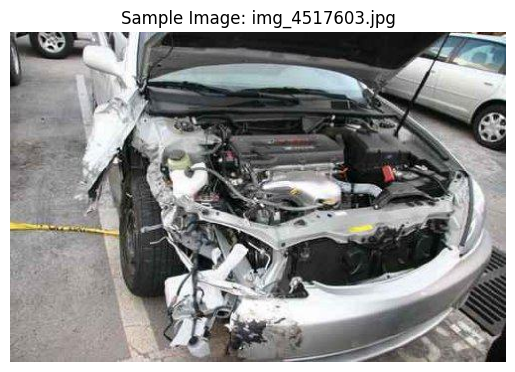

In [27]:
import random
from PIL import Image

# Display random sample images
random_image = random.choice(os.listdir(train_images_path))
img = Image.open(os.path.join(train_images_path, random_image))
plt.imshow(img)
plt.title(f"Sample Image: {random_image}")
plt.axis('off')
plt.show()

In [28]:
dimensions = []
for image_name in os.listdir(train_images_path):
    img = Image.open(os.path.join(train_images_path, image_name))
    dimensions.append(img.size)  # (width, height)

# Find unique dimensions and common sizes
from collections import Counter
dimension_counts = Counter(dimensions)
print("Most common dimensions:", dimension_counts.most_common(5))

Most common dimensions: [((275, 183), 196), ((259, 194), 74), ((300, 168), 59), ((276, 183), 27), ((284, 177), 18)]


In [29]:
corrupted_images = []
for image_name in os.listdir(train_images_path):
    try:
        img = Image.open(os.path.join(train_images_path, image_name))
        img.verify()  # Verify if the image is valid
    except (IOError, SyntaxError):
        corrupted_images.append(image_name)

print(f"Corrupted images: {corrupted_images}")


Corrupted images: []


In [30]:
def get_average_brightness(image_path):
    img = Image.open(image_path).convert('L')  # Convert to grayscale
    img_array = np.array(img)
    return np.mean(img_array)

brightness_values = [
    get_average_brightness(os.path.join(train_images_path, img))
    for img in os.listdir(train_images_path)
]

print("Average brightness of first 5 images:", brightness_values[:5])

Average brightness of first 5 images: [np.float64(74.42773618538324), np.float64(92.35538752362949), np.float64(96.09352665245203), np.float64(105.88629918337045), np.float64(129.78392857142856)]


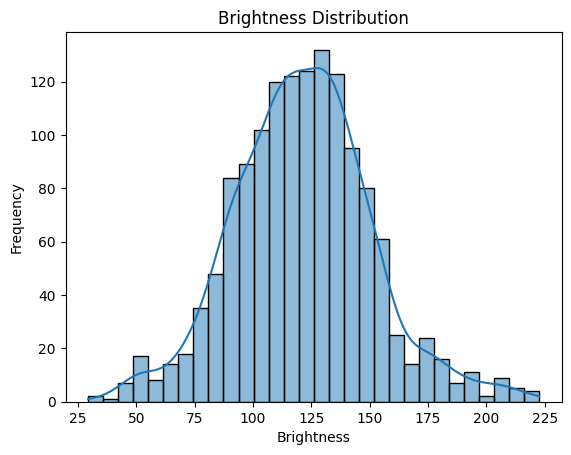

In [31]:
# Plot brightness distribution
sns.histplot(brightness_values, bins=30, kde=True)
plt.title("Brightness Distribution")
plt.xlabel("Brightness")
plt.ylabel("Frequency")
plt.show()

In [32]:
file_sizes = [os.path.getsize(os.path.join(train_images_path, img)) for img in os.listdir(train_images_path)]
print("Average file size:", sum(file_sizes) / len(file_sizes), "bytes")


Average file size: 54886.19442458899 bytes


In [33]:
train_data_cleaned['Condition'].value_counts()

Condition
1    1213
0      97
Name: count, dtype: int64

In [34]:
train_images_path = "Fast_Furious_Insured/images/train_images/"
train_data_cleaned['Image_path'] = train_data_cleaned['Image_path'].apply(lambda x: os.path.join(train_images_path, x))

test_images_path="Fast_Furious_Insured/images/test_images/"
test_data['Image_path'] = test_data['Image_path'].apply(lambda x: os.path.join(test_images_path, x))

C:\Users\varsh\AppData\Local\Temp\ipykernel_9692\2484344671.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data_cleaned['Image_path'] = train_data_cleaned['Image_path'].apply(lambda x: os.path.join(train_images_path, x))


In [35]:
print(train_data_cleaned.head())
print(test_data.head())

                                          Image_path Insurance_company  \
0  Fast_Furious_Insured/images/train_images/img_4...                BQ   
1  Fast_Furious_Insured/images/train_images/img_7...                BQ   
2  Fast_Furious_Insured/images/train_images/img_4...                 A   
3  Fast_Furious_Insured/images/train_images/img_7...                 A   
4  Fast_Furious_Insured/images/train_images/img_7...                AC   

   Cost_of_vehicle  Min_coverage Expiry_date  Max_coverage  Condition  Amount  
0          41500.0        1037.5  03-12-2026      36142.68          0     0.0  
1          50700.0        1267.5  10-07-2025      12753.00          1  6194.0  
2          49500.0        1237.5  11-08-2022      43102.68          0     0.0  
3          33500.0         837.5  02-08-2022       8453.00          1  7699.0  
4          27600.0         690.0  01-05-2026       6978.00          1  8849.0  
                                          Image_path Insurance_company  \
0

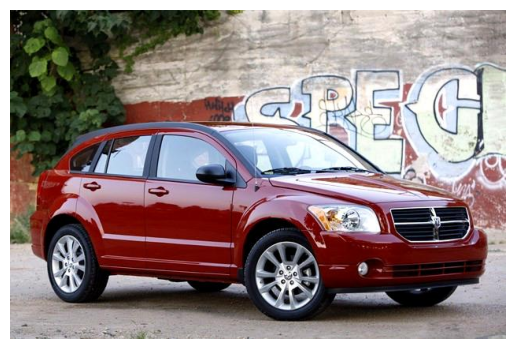

In [36]:
import cv2
import matplotlib.pyplot as plt

# Load and display a sample image from train_images
sample_image_path = train_data_cleaned['Image_path'].iloc[0]  # Get first image path
image = cv2.imread(sample_image_path)  # Load the image

if image is not None:
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.show()
else:
    print(f"Error loading image: {sample_image_path}")

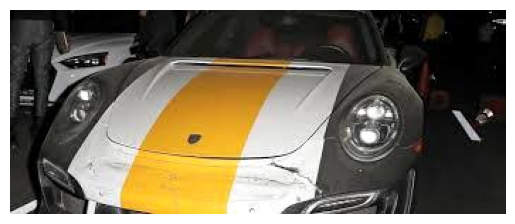

In [37]:
# Load and display a sample image from test_images
sample_image_path = test_data['Image_path'].iloc[0]  # Get first image path
image = cv2.imread(sample_image_path)  # Load the image

if image is not None:
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.show()
else:
    print(f"Error loading image: {sample_image_path}")

In [38]:
# Save the cleaned data as .pkl
train_data_cleaned.to_pickle('Fast_Furious_Insured/processed_data/train_data_cleaned.pkl')
test_data.to_pickle('Fast_Furious_Insured/processed_data/test_data_cleaned.pkl')

print("Cleaned data saved as Pickle file.")


Cleaned data saved as Pickle file.


In [39]:
train_data_cleaned.shape

(1310, 8)